### Medical Cost Personal Datasets

This data takes account of the insurance amount paid by individuals on some personal details 


https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance

Content Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to    height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
price = pd.read_csv('insurance.csv')
price

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#display details about the type of data, either object or int
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#display the sum of empty columns
price.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#the amount of unique data in each coulmn
price.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: >

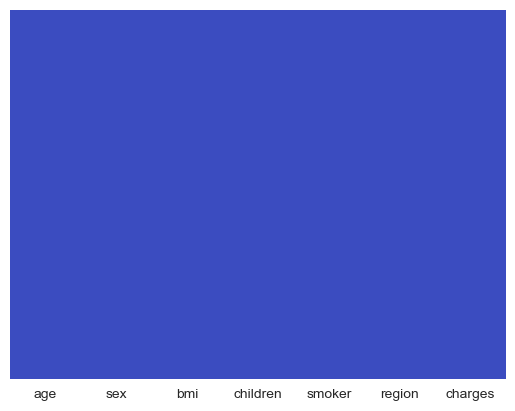

In [6]:
sns.heatmap(price.isnull(),yticklabels = False,cbar = False,cmap = 'coolwarm')

# EDA

In [7]:
price.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
price_df = price.select_dtypes(include=['float64', 'int64'])

In [9]:
### coeffeicient correlation between the numerical items
price_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

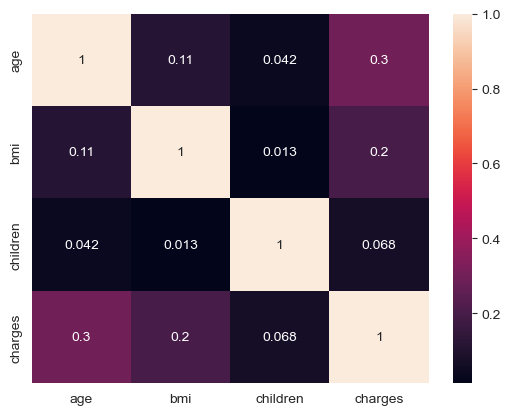

In [10]:
#visual display of the coeffeicient correlation between the items
sns.heatmap(price_df.corr(), annot = True)

In [11]:
#correlation of the charge to the other factors
price_df.corr()['charges'][:-1]
#age plays a huge role 

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

<Axes: >

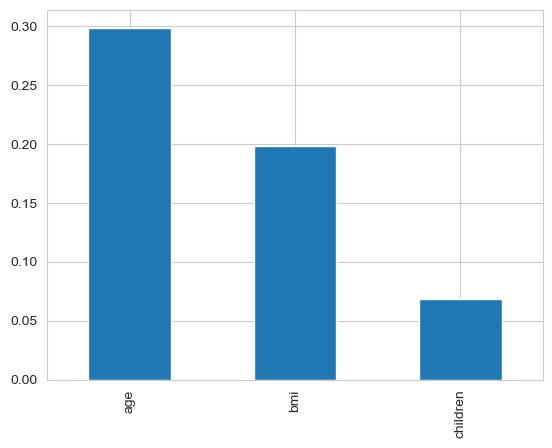

In [12]:
#visual correlation of the charges to the other factors
price_df.corr()['charges'][:-1].plot(kind = 'bar')

<Axes: xlabel='charges', ylabel='Density'>

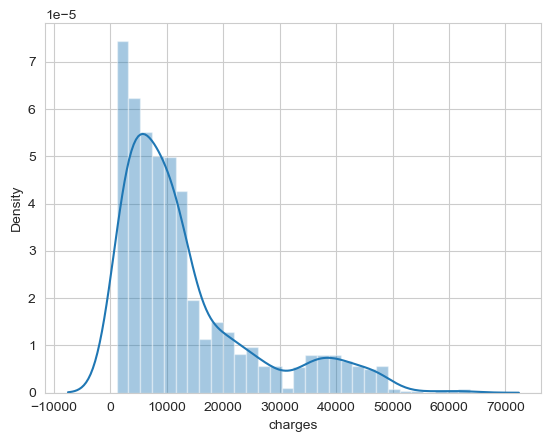

In [13]:
### distribution of target
sns.distplot(price['charges'])
#can see outlier price of  60000

<Axes: xlabel='charges', ylabel='Count'>

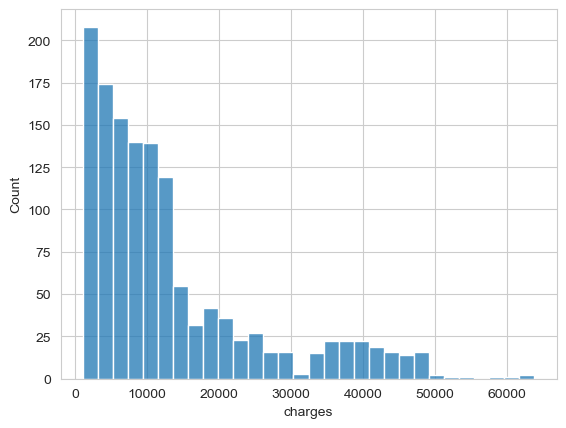

In [14]:
sns.histplot(price['charges'])
#the price plays within 48000 and grades into 63000 and does looks like outliers

In [15]:
price['charges'].sort_values(ascending = False)[:15]
#the price plays within 48000 and grades into 63000 and does not look like an outlier

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
1146    52590.82939
34      51194.55914
1241    49577.66240
1062    48970.24760
488     48885.13561
175     48824.45000
530     48675.51770
901     48673.55880
281     48549.17835
330     48517.56315
Name: charges, dtype: float64

In [16]:
#values above 48000
price[price['charges'] >= 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [17]:
#retrieve index location for prices greater than 50k
x = price[price['charges'] >= 50000].index
price.drop(x, axis = 0, inplace = True)

<Axes: xlabel='charges', ylabel='Count'>

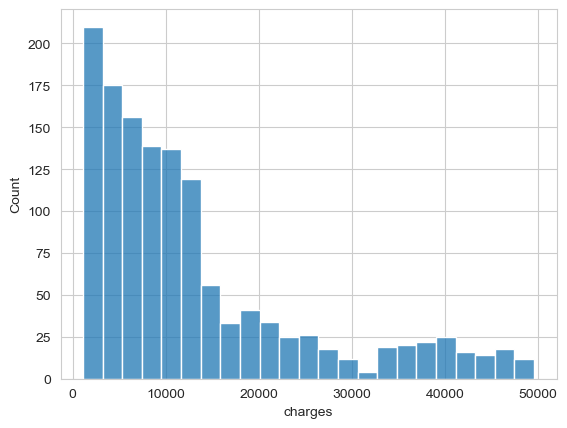

In [18]:
sns.histplot(price['charges'])

<Axes: xlabel='age', ylabel='Density'>

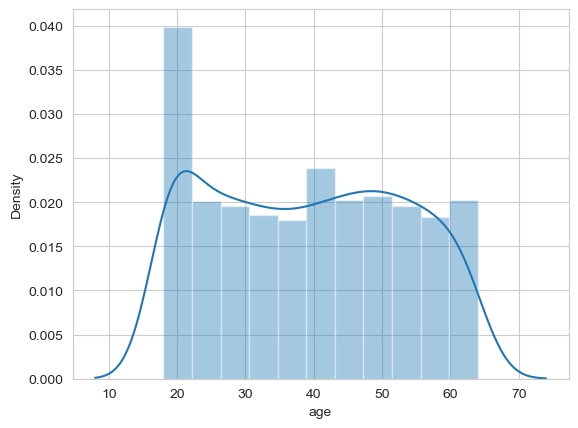

In [19]:
sns.distplot(price['age'],kde = True)

<Axes: xlabel='bmi', ylabel='Density'>

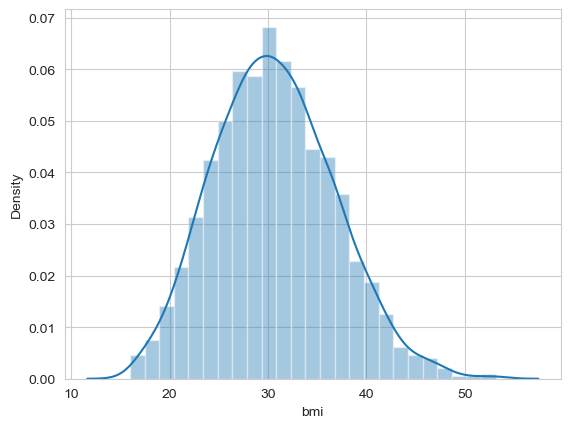

In [20]:
sns.distplot(price['bmi'])

<Axes: xlabel='sex', ylabel='count'>

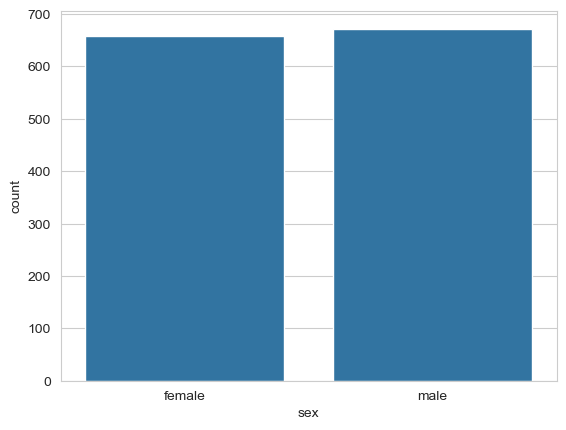

In [21]:
#countplot of the male and female of the amount of peple in the data
sns.countplot(x = 'sex', data = price)

<Axes: xlabel='region', ylabel='count'>

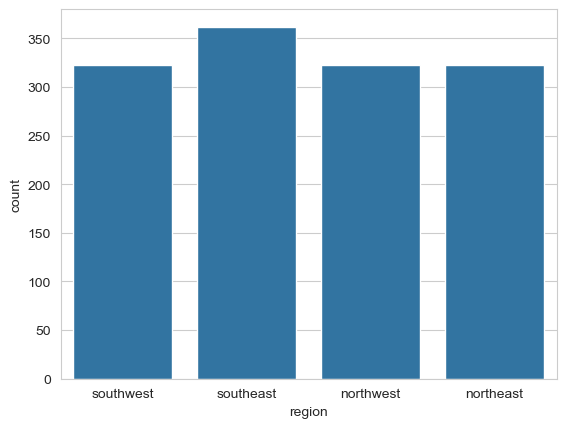

In [22]:
#countplot of the regions in the data
sns.countplot(x = 'region', data = price)

<Axes: xlabel='region', ylabel='count'>

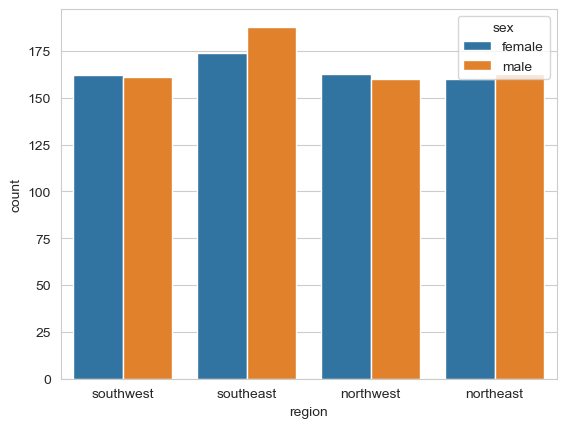

In [23]:
#showing regions with more gender
sns.countplot(x = 'region',hue = 'sex',data = price)

<Axes: xlabel='smoker', ylabel='count'>

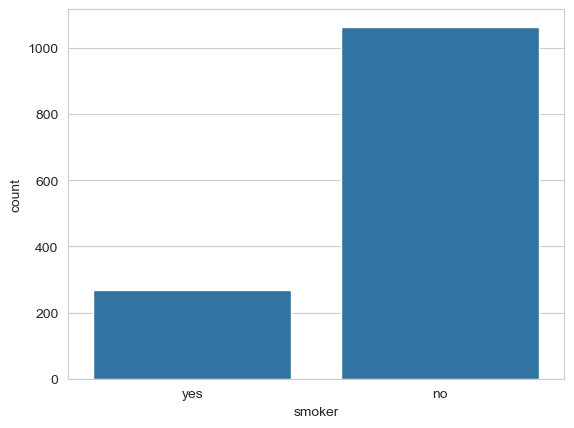

In [24]:
#the amount of smokers
sns.countplot(x = 'smoker', data = price)

<Axes: xlabel='smoker', ylabel='count'>

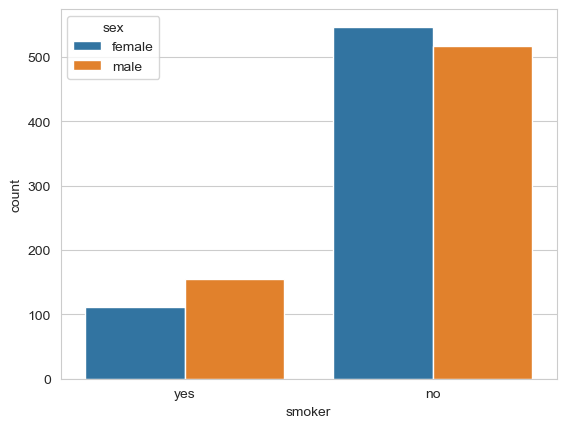

In [25]:
#the gender with high amount of smokers is men
sns.countplot(x = 'smoker', hue = 'sex',data = price)

<Axes: xlabel='children', ylabel='count'>

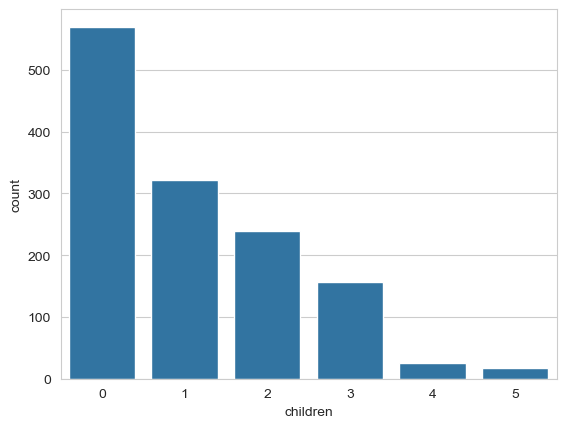

In [26]:
#shows the amount of kids owned by individuals
sns.countplot(x = 'children', data = price)

<Axes: xlabel='sex', ylabel='charges'>

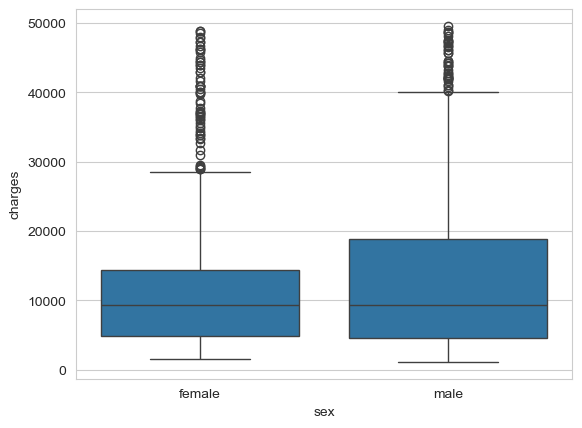

In [27]:
#visualisation of the ean, percentile charges payed by each gender,
sns.boxplot(x = 'sex', y = 'charges', data = price)

<Axes: xlabel='sex', ylabel='charges'>

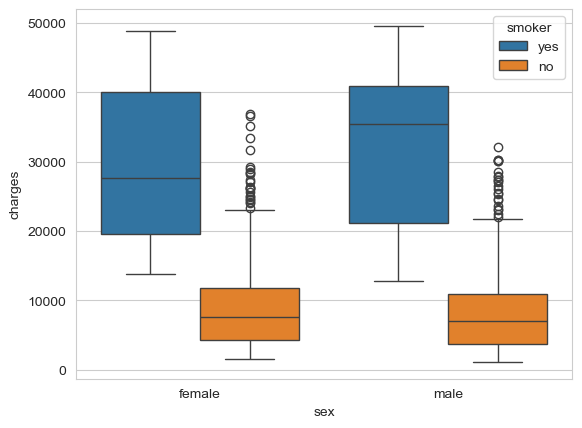

In [28]:
sns.boxplot(x = 'sex', y = 'charges',hue= 'smoker',data = price)
#smokers pay more insurance price than non smokers

<Axes: xlabel='children', ylabel='charges'>

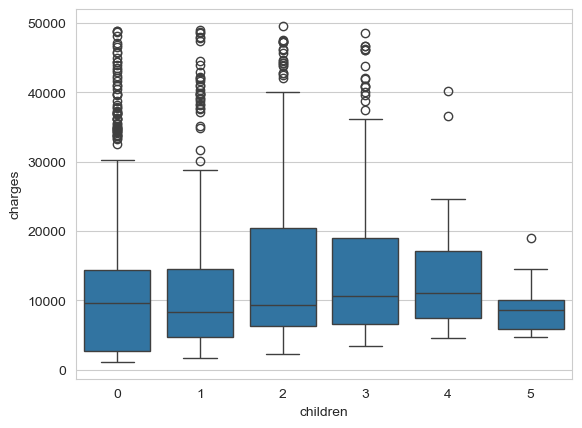

In [29]:
sns.boxplot(x = 'children', y = 'charges', data = price)

<Axes: xlabel='sex', ylabel='age'>

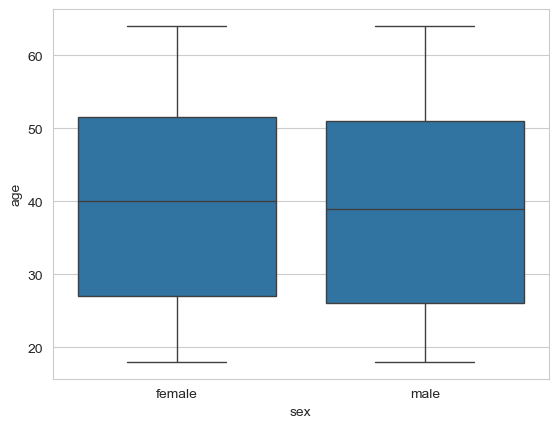

In [30]:
#mean age of female older than male
sns.boxplot(x = 'sex', y = 'age',data = price)

# DATA PREPROCESSING

In [31]:
price

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Encoding the Independent Variable

In [32]:
NEW = pd.get_dummies(price['region'])
NEW

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [33]:
price.drop('region',axis = 1, inplace = True)

In [34]:
price= pd.concat([price,NEW],axis= 1)
price

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,False,True,False,False
1334,18,female,31.920,0,no,2205.98080,True,False,False,False
1335,18,female,36.850,0,no,1629.83350,False,False,True,False
1336,21,female,25.800,0,no,2007.94500,False,False,False,True


In [35]:
y = price['charges'].values
price.drop('charges', axis = 1, inplace = True)
X = price.values

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1]= le.fit_transform(X[:,1])
X[:, 4] = le.fit_transform(X[:,4])

### Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

# DECISION TREE REGRESSION

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[19798.05 21259.38]
 [13352.1  12731.  ]
 [ 7640.31  7682.67]
 [43921.18 44260.75]
 [ 5469.01  4889.04]
 [19594.81 19964.75]
 [ 1708.93  1708.  ]
 [14711.74 16420.49]
 [11073.18 35160.13]
 [10435.07 20781.49]
 [ 8823.99 20878.78]
 [29186.48 11987.17]
 [ 1877.93  1621.88]
 [ 3556.92  3353.47]
 [ 4738.27  5327.4 ]
 [ 7371.77  6875.96]
 [27724.29  3056.39]
 [20277.81 18157.88]
 [14571.89 14283.46]
 [36197.7  37742.58]
 [33475.82 34254.05]
 [10435.07  9850.43]
 [35595.59 34806.47]
 [ 4137.52  3756.62]
 [46889.26 47055.53]
 [ 4561.19  3393.36]
 [ 1728.9   2198.19]
 [ 2710.83  2221.56]
 [14571.89 13747.87]
 [ 5966.89  5969.72]
 [11674.13 10450.55]
 [47896.79 47496.49]
 [ 1532.47  1534.3 ]
 [16069.08 13607.37]
 [ 9288.03  9282.48]
 [ 1252.41  1241.57]
 [ 6548.2   5926.85]
 [ 8310.84  7256.72]
 [ 1728.9   7323.73]
 [ 3176.82  3021.81]
 [ 7046.72  7050.64]
 [40932.43 43753.34]
 [34672.15 37079.37]
 [ 4357.04  3972.92]
 [43254.42 44641.2 ]
 [14235.07 15170.07]
 [ 1728.9   2196.47]
 [11944.59 20

# Evaluating the Model Performance


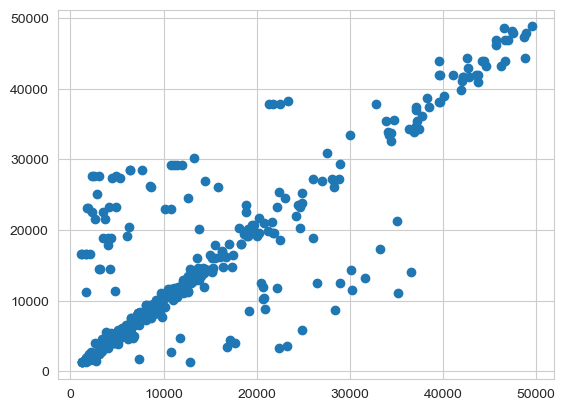

In [39]:
print(plt.scatter(y_test,predictions))

In [40]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

3245.9101747188847
46432264.83648625
6814.122455348616
0.6833322124406283


# Scaling and Train Test Split

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Simple Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[31552.   21259.38]
 [13184.   12731.  ]
 [ 9792.    7682.67]
 [36608.   44260.75]
 [ 6976.    4889.04]
 [30656.   19964.75]
 [ 1856.    1708.  ]
 [26496.   16420.49]
 [11072.   35160.13]
 [12416.   20781.49]
 [11136.   20878.78]
 [13568.   11987.17]
 [ 2944.    1621.88]
 [ 2432.    3353.47]
 [ 7232.    5327.4 ]
 [ 9472.    6875.96]
 [ 4288.    3056.39]
 [ 5824.   18157.88]
 [24320.   14283.46]
 [31680.   37742.58]
 [28352.   34254.05]
 [11840.    9850.43]
 [28928.   34806.47]
 [ 4608.    3756.62]
 [38400.   47055.53]
 [ 6208.    3393.36]
 [ 2112.    2198.19]
 [ 1920.    2221.56]
 [24256.   13747.87]
 [ 7616.    5969.72]
 [14400.   10450.55]
 [38400.   47496.49]
 [ 5248.    1534.3 ]
 [14016.   13607.37]
 [ 9792.    9282.48]
 [   64.    1241.57]
 [ 7424.    5926.85]
 [ 8960.    7256.72]
 [ 2944.    7323.73]
 [ 5568.    3021.81]
 [ 8576.    7050.64]
 [35264.   43753.34]
 [30848.   37079.37]
 [ 5760.    3972.92]
 [36672.   44641.2 ]
 [17280.   15170.07]
 [ 1792.    2196.47]
 [15424.   20

# Evaluating the Model Performance

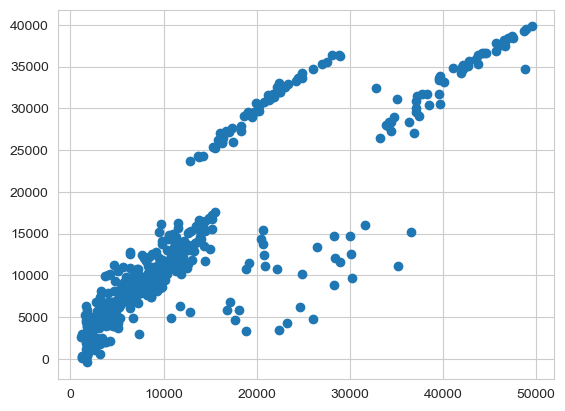

In [43]:
print(plt.scatter(y_test,predictions))


In [44]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

4085.7506647188843
34891166.65788494
5906.8745253208945
0.7620424377353318


# Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
poly = LinearRegression()
poly.fit(X_poly, y_train)
predictions = poly.predict(poly_reg.fit_transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[22560.   21259.38]
 [13568.   12731.  ]
 [ 7552.    7682.67]
 [41088.   44260.75]
 [ 6688.    4889.04]
 [21728.   19964.75]
 [ 1984.    1708.  ]
 [20896.   16420.49]
 [12864.   35160.13]
 [11936.   20781.49]
 [11232.   20878.78]
 [14464.   11987.17]
 [ 3296.    1621.88]
 [ 4768.    3353.47]
 [ 7584.    5327.4 ]
 [ 7584.    6875.96]
 [ 5856.    3056.39]
 [ 6304.   18157.88]
 [16192.   14283.46]
 [35840.   37742.58]
 [29696.   34254.05]
 [11872.    9850.43]
 [30240.   34806.47]
 [ 5888.    3756.62]
 [44864.   47055.53]
 [ 8000.    3393.36]
 [ 4096.    2198.19]
 [ 4864.    2221.56]
 [11328.   13747.87]
 [ 7904.    5969.72]
 [10880.   10450.55]
 [50816.   47496.49]
 [ 3840.    1534.3 ]
 [15616.   13607.37]
 [11360.    9282.48]
 [ 1472.    1241.57]
 [ 5728.    5926.85]
 [ 7488.    7256.72]
 [ 4608.    7323.73]
 [ 3712.    3021.81]
 [ 8640.    7050.64]
 [42752.   43753.34]
 [33632.   37079.37]
 [ 5792.    3972.92]
 [43936.   44641.2 ]
 [19232.   15170.07]
 [ 3872.    2196.47]
 [10816.   20

# Evaluating the Model Performance

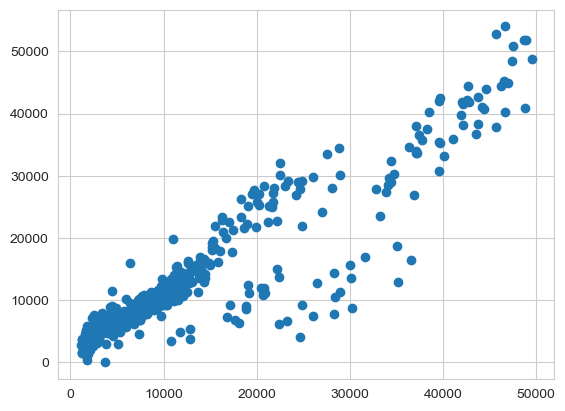

In [46]:
print(plt.scatter(y_test,predictions))

In [47]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

3097.9519331738193
22609330.840595596
4754.927006863049
0.8458044896000149


#  Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[20800.54 21259.38]
 [21564.53 12731.  ]
 [ 7319.46  7682.67]
 [45439.49 44260.75]
 [ 6691.04  4889.04]
 [20345.01 19964.75]
 [ 1707.84  1708.  ]
 [16319.13 16420.49]
 [12811.49 35160.13]
 [10570.18 20781.49]
 [12385.06 20878.78]
 [14020.68 11987.17]
 [ 8082.35  1621.88]
 [ 3187.74  3353.47]
 [ 6398.08  5327.4 ]
 [ 6917.33  6875.96]
 [ 6477.65  3056.39]
 [ 7811.19 18157.88]
 [15888.74 14283.46]
 [36916.26 37742.58]
 [34576.55 34254.05]
 [10473.02  9850.43]
 [36115.33 34806.47]
 [ 6152.52  3756.62]
 [47398.9  47055.53]
 [ 5844.52  3393.36]
 [ 2436.6   2198.19]
 [ 4083.17  2221.56]
 [15433.51 13747.87]
 [ 7593.13  5969.72]
 [10718.08 10450.55]
 [47294.18 47496.49]
 [ 1541.07  1534.3 ]
 [13111.14 13607.37]
 [ 9179.86  9282.48]
 [ 1576.21  1241.57]
 [ 6422.32  5926.85]
 [ 7192.07  7256.72]
 [ 7993.83  7323.73]
 [ 2766.69  3021.81]
 [ 6926.84  7050.64]
 [42236.55 43753.34]
 [37044.33 37079.37]
 [ 6351.48  3972.92]
 [43379.1  44641.2 ]
 [19715.41 15170.07]
 [ 2436.26  2196.47]
 [11289.67 20

# Evaluating the Model Performance

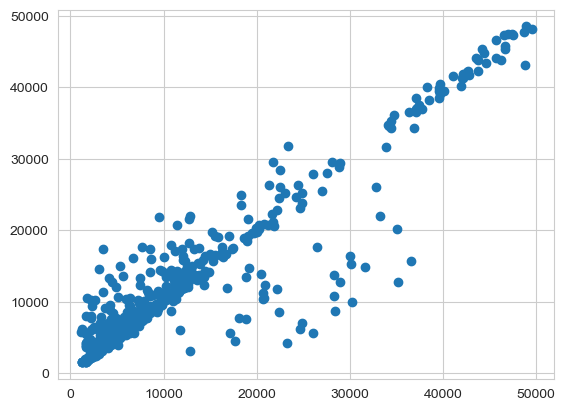

In [49]:
print(plt.scatter(y_test,predictions))

In [50]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

2557.6959863066886
21608973.475408465
4648.5453074492525
0.852626921258649


# XGBRegressor

In [51]:
from xgboost import XGBRegressor
xgb= XGBRegressor()
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[20507.07 21259.38]
 [20782.25 12731.  ]
 [ 7569.42  7682.67]
 [48211.06 44260.75]
 [ 5140.24  4889.04]
 [21031.57 19964.75]
 [ 1000.49  1708.  ]
 [18372.92 16420.49]
 [13627.39 35160.13]
 [ 9730.39 20781.49]
 [10213.33 20878.78]
 [16821.65 11987.17]
 [ 1094.83  1621.88]
 [ 2299.16  3353.47]
 [ 6336.56  5327.4 ]
 [10607.16  6875.96]
 [ 4836.41  3056.39]
 [13358.48 18157.88]
 [19379.62 14283.46]
 [37525.8  37742.58]
 [34793.45 34254.05]
 [ 9763.48  9850.43]
 [32645.67 34806.47]
 [ 6353.78  3756.62]
 [46821.37 47055.53]
 [ 5066.95  3393.36]
 [ 2697.96  2198.19]
 [ 2753.79  2221.56]
 [18405.11 13747.87]
 [ 7739.39  5969.72]
 [ 9612.88 10450.55]
 [50189.25 47496.49]
 [ 3135.33  1534.3 ]
 [12252.37 13607.37]
 [11104.4   9282.48]
 [  660.43  1241.57]
 [ 4406.83  5926.85]
 [ 8631.54  7256.72]
 [ 5292.21  7323.73]
 [ 3736.41  3021.81]
 [ 5143.9   7050.64]
 [41618.25 43753.34]
 [35021.33 37079.37]
 [ 2879.06  3972.92]
 [43885.49 44641.2 ]
 [21012.38 15170.07]
 [ 3468.25  2196.47]
 [10555.04 20

In [52]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

2869.566161575574
22711813.097706515
4765.691250774279
0.8451055611773396


# CatBoostRegressor

In [53]:
from catboost import CatBoostRegressor
Reg = CatBoostRegressor()
Reg.fit(X_train, y_train)
predictions = Reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

Learning rate set to 0.040015
0:	learn: 11118.5633216	total: 59.1ms	remaining: 59s
1:	learn: 10826.2680149	total: 60.3ms	remaining: 30.1s
2:	learn: 10515.8560345	total: 61.4ms	remaining: 20.4s
3:	learn: 10213.8218135	total: 62.4ms	remaining: 15.5s
4:	learn: 9952.5783347	total: 63.5ms	remaining: 12.6s
5:	learn: 9694.7897156	total: 64.4ms	remaining: 10.7s
6:	learn: 9448.5820186	total: 65.2ms	remaining: 9.25s
7:	learn: 9216.3927171	total: 66ms	remaining: 8.19s
8:	learn: 8979.4181721	total: 66.8ms	remaining: 7.36s
9:	learn: 8765.7867748	total: 67.6ms	remaining: 6.7s
10:	learn: 8563.5151662	total: 68ms	remaining: 6.11s
11:	learn: 8384.1602172	total: 68.8ms	remaining: 5.67s
12:	learn: 8196.3609357	total: 69.2ms	remaining: 5.26s
13:	learn: 8013.9267682	total: 69.9ms	remaining: 4.92s
14:	learn: 7822.2872553	total: 70.5ms	remaining: 4.63s
15:	learn: 7680.9460191	total: 70.7ms	remaining: 4.35s
16:	learn: 7514.9435878	total: 71.6ms	remaining: 4.14s
17:	learn: 7368.4644610	total: 71.9ms	remaining:

281:	learn: 3642.6712279	total: 189ms	remaining: 481ms
282:	learn: 3637.9686894	total: 190ms	remaining: 480ms
283:	learn: 3634.4929981	total: 190ms	remaining: 479ms
284:	learn: 3633.3001711	total: 191ms	remaining: 478ms
285:	learn: 3632.2730022	total: 191ms	remaining: 477ms
286:	learn: 3631.3643598	total: 191ms	remaining: 475ms
287:	learn: 3628.3103430	total: 192ms	remaining: 474ms
288:	learn: 3626.5792821	total: 192ms	remaining: 473ms
289:	learn: 3625.7795658	total: 193ms	remaining: 472ms
290:	learn: 3624.3969130	total: 193ms	remaining: 470ms
291:	learn: 3623.6222499	total: 193ms	remaining: 469ms
292:	learn: 3622.4813930	total: 194ms	remaining: 468ms
293:	learn: 3621.5520818	total: 194ms	remaining: 466ms
294:	learn: 3621.1813379	total: 195ms	remaining: 465ms
295:	learn: 3620.3290717	total: 195ms	remaining: 464ms
296:	learn: 3619.9735561	total: 195ms	remaining: 463ms
297:	learn: 3619.1013877	total: 196ms	remaining: 461ms
298:	learn: 3617.6992910	total: 196ms	remaining: 460ms
299:	learn

702:	learn: 2882.0455270	total: 377ms	remaining: 159ms
703:	learn: 2881.3582118	total: 378ms	remaining: 159ms
704:	learn: 2879.8143261	total: 378ms	remaining: 158ms
705:	learn: 2879.4519519	total: 379ms	remaining: 158ms
706:	learn: 2877.5064657	total: 379ms	remaining: 157ms
707:	learn: 2876.6593116	total: 380ms	remaining: 157ms
708:	learn: 2875.4170653	total: 380ms	remaining: 156ms
709:	learn: 2874.9650682	total: 380ms	remaining: 155ms
710:	learn: 2873.9690843	total: 381ms	remaining: 155ms
711:	learn: 2873.0013903	total: 381ms	remaining: 154ms
712:	learn: 2871.7514422	total: 382ms	remaining: 154ms
713:	learn: 2870.3692928	total: 382ms	remaining: 153ms
714:	learn: 2868.6863770	total: 383ms	remaining: 152ms
715:	learn: 2866.2398125	total: 383ms	remaining: 152ms
716:	learn: 2864.8416268	total: 383ms	remaining: 151ms
717:	learn: 2863.3794980	total: 384ms	remaining: 151ms
718:	learn: 2861.8282895	total: 384ms	remaining: 150ms
719:	learn: 2860.6809097	total: 385ms	remaining: 150ms
720:	learn

In [54]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.r2_score(y_test, predictions))

2570.1111933513935
19342370.527486403
4397.996194573889
0.868085140738609


# Comment
Random Forest regression and Cat boost regressor actually have the lowest mean squared error, which describes the range (+ or -) we are within our answer and also the highest r square, furthermore pre processing of the data for outliers might help reduce the mean squared error